# Choke setup

This example shows how to use PyAEDT to create a choke setup in Maxwell 3D.

Keywords: **Maxwell 3D**, **choke**.

## Perform imports and define constants

Perform required imports.

In [1]:
import json
import os
import tempfile
import time

In [2]:
import ansys.aedt.core

Define constants.

In [3]:
AEDT_VERSION = "2024.2"
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``

In [4]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Launch Maxwell3D

Launch Maxwell 3D 2024 R2 in graphical mode.

In [5]:
project_name = os.path.join(temp_folder.name, "choke.aedt")
m3d = ansys.aedt.core.Maxwell3d(
    project=project_name,
    solution_type="EddyCurrent",
    version=AEDT_VERSION,
    non_graphical=NG_MODE,
    new_desktop=True,
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_fece2519-9264-449e-88dc-1b4837af0e2d.log is enabled.


PyAEDT INFO: Log on AEDT is enabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 50992


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.2 version started with process ID 2964.


PyAEDT INFO: Project choke has been created.


PyAEDT INFO: No design is present. Inserting a new design.


PyAEDT INFO: Added design 'Maxwell 3D_3YP' of type Maxwell 3D.


PyAEDT INFO: Aedt Objects correctly read


## Define parameters

The dictionary values contain the different parameter values of the core and
the windings that compose the choke. You must not change the main structure of
the dictionary. The dictionary has many primary keys, including
``"Number of Windings"``, ``"Layer"``, and ``"Layer Type"``, that have
dictionaries as values. The keys of these dictionaries are secondary keys
of the dictionary values, such as ``"1"``, ``"2"``, ``"3"``, ``"4"``, and
``"Simple"``.

You must not modify the primary or secondary keys. You can modify only their values.
You must not change the data types for these keys. For the dictionaries from
``"Number of Windings"`` through ``"Wire Section"``, values must be Boolean. Only
one value per dictionary can be ``True``. If all values are ``True``, only the first one
remains set to ``True``. If all values are ``False``, the first value is chosen as the
correct one by default. For the dictionaries from ``"Core"`` through ``"Inner Winding"``,
values must be strings, floats, or integers.

Descriptions follow for the primary keys:

- ``"Number of Windings"``: Number of windings around the core.
- ``"Layer"``: Number of layers of all windings.
- ``"Layer Type"``: Whether layers of a winding are linked to each other
- ``"Similar Layer"``: Whether layers of a winding have the same number of turns and
same spacing between turns.
- ``"Mode"``: When there are only two windows, whether they are in common or differential mode.
- ``"Wire Section"``: Type of wire section and number of segments.
- ``"Core"``: Design of the core.
- ``"Outer Winding"``: Design of the first layer or outer layer of a winding and the common
parameters for all layers.
- ``"Mid Winding"``: Turns and turns spacing (``Coil Pit``) for the second or
mid layer if it is necessary.
- ``"Inner Winding"``: Turns and turns spacing (``Coil Pit``) for the third or inner
layer if it is necessary.
- ``"Occupation(%)"``: An informative parameter that is useless to modify.

The following parameter values work. You can modify them if you want.

In [6]:
values = {
    "Number of Windings": {"1": False, "2": False, "3": True, "4": False},
    "Layer": {"Simple": False, "Double": False, "Triple": True},
    "Layer Type": {"Separate": False, "Linked": True},
    "Similar Layer": {"Similar": False, "Different": True},
    "Mode": {"Differential": True, "Common": False},
    "Wire Section": {"None": False, "Hexagon": False, "Octagon": True, "Circle": False},
    "Core": {
        "Name": "Core",
        "Material": "ferrite",
        "Inner Radius": 100,
        "Outer Radius": 143,
        "Height": 25,
        "Chamfer": 0.8,
    },
    "Outer Winding": {
        "Name": "Winding",
        "Material": "copper",
        "Inner Radius": 100,
        "Outer Radius": 143,
        "Height": 25,
        "Wire Diameter": 5,
        "Turns": 2,
        "Coil Pit(deg)": 4,
        "Occupation(%)": 0,
    },
    "Mid Winding": {"Turns": 7, "Coil Pit(deg)": 4, "Occupation(%)": 0},
    "Inner Winding": {"Turns": 10, "Coil Pit(deg)": 4, "Occupation(%)": 0},
}

## Convert dictionary to JSON file

Convert the dictionary to a JSON file. PyAEDT methods ask for the path of the
JSON file as an argument. You can convert a dictionary to a JSON file.

In [7]:
json_path = os.path.join(temp_folder.name, "choke_example.json")

with open(json_path, "w") as outfile:
    json.dump(values, outfile)

## Verify parameters of JSON file

Verify parameters of the JSON file. The ``check_choke_values()`` method takes
the JSON file path as an argument and does the following:

- Checks if the JSON file is correctly written (as explained earlier)
- Checks equations on windings parameters to avoid having unintended intersections

In [8]:
dictionary_values = m3d.modeler.check_choke_values(
    input_dir=json_path, create_another_file=False
)
print(dictionary_values)

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


PyAEDT WARNING: Inner Radius of the winding is too high. The maximum value has been set instead.


PyAEDT WARNING: Outer Radius of the winding is too low. The minimum value has been set instead.


PyAEDT WARNING: Height of the winding is too low. The minimum value has been set instead.


[True, {'Number of Windings': {'1': False, '2': False, '3': True, '4': False}, 'Layer': {'Simple': False, 'Double': False, 'Triple': True}, 'Layer Type': {'Separate': False, 'Linked': True}, 'Similar Layer': {'Similar': False, 'Different': True}, 'Mode': {'Differential': True, 'Common': False}, 'Wire Section': {'None': False, 'Hexagon': False, 'Octagon': True, 'Circle': False}, 'Core': {'Name': 'Core', 'Material': 'ferrite', 'Inner Radius': 100, 'Outer Radius': 143, 'Height': 25, 'Chamfer': 0.8}, 'Outer Winding': {'Name': 'Winding', 'Material': 'copper', 'Inner Radius': 86.25, 'Outer Radius': 156.75, 'Height': 52.5, 'Wire Diameter': 5, 'Turns': 2, 'Coil Pit(deg)': 4, 'Occupation(%)': 13.333333333333334}, 'Mid Winding': {'Turns': 7, 'Coil Pit(deg)': 4.0, 'Occupation(%)': 46.666666666666664}, 'Inner Winding': {'Turns': 10, 'Coil Pit(deg)': 4.0, 'Occupation(%)': 66.66666666666667}}]


## Create choke

Create the choke. The ``create_choke()`` method takes the JSON file path as an
argument.

In [9]:
list_object = m3d.modeler.create_choke(input_file=json_path)
print(list_object)
core = list_object[1]
first_winding_list = list_object[2]
second_winding_list = list_object[3]
third_winding_list = list_object[4]

PyAEDT INFO: CHOKE INFO: {'Number of Windings': {'1': False, '2': False, '3': True, '4': False}, 'Layer': {'Simple': False, 'Double': False, 'Triple': True}, 'Layer Type': {'Separate': False, 'Linked': True}, 'Similar Layer': {'Similar': False, 'Different': True}...


PyAEDT INFO: Parsing design objects. This operation can take time


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmppic7319n.ansys/choke.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmppic7319n.ansys/choke.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.0


PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec


PyAEDT INFO: Deleted 3 Objects: Winding,Winding_1,Winding_2.


PyAEDT INFO: Deleted 7 Objects: Winding,Winding_1,Winding_2,Winding_3,Winding_4,Winding_5,Winding_6.


PyAEDT INFO: Deleted 10 Objects: Winding,Winding_1,Winding_2,Winding_3,Winding_4,Winding_5,Winding_6,Winding_7,Winding_8,Winding_9.


PyAEDT INFO: Deleted 3 Objects: Winding_2,Winding_1,Winding.


PyAEDT INFO: Creating triple linked winding


PyAEDT INFO: Choke created correctly


[<ansys.aedt.core.modeler.cad.object_3d.Object3d object at 0x000002358968CB20>, <ansys.aedt.core.modeler.cad.object_3d.Object3d object at 0x00000235F5FAAFE0>, [<ansys.aedt.core.modeler.cad.polylines.Polyline object at 0x00000235F5FAAD40>, [[-74.497822093321, 62.511095042016, -52.5], [-74.497822093321, 62.511095042016, 12.839087296526], [-76.344688372662, 64.060799855845, 15.25], [-115.963757581084, 84.252601589961, 15.25], [-117.914226930149, 85.669700521628, 12.839087296526], [-117.914226930149, 85.669700521628, -12.839087296526], [-115.963757581084, 84.252601589961, -15.25], [-84.517247279393, 52.812237532635, -15.25], [-82.472677351212, 51.534648446679, -12.839087296526], [-82.472677351212, 51.534648446679, 12.839087296526], [-84.517247279393, 52.812237532635, 15.25], [-126.560902091063, 67.293625321403, 15.25], [-128.689611659189, 68.425480276044, 12.839087296526], [-128.689611659189, 68.425480276044, -12.839087296526], [-126.560902091063, 67.293625321403, -15.25], [-91.04477410477

## Assign excitations

In [10]:
first_winding_faces = m3d.modeler.get_object_faces(
    assignment=first_winding_list[0].name
)
second_winding_faces = m3d.modeler.get_object_faces(
    assignment=second_winding_list[0].name
)
third_winding_faces = m3d.modeler.get_object_faces(
    assignment=third_winding_list[0].name
)
m3d.assign_current(
    assignment=[first_winding_faces[-1]],
    amplitude=1000,
    phase="0deg",
    swap_direction=False,
    name="phase_1_in",
)
m3d.assign_current(
    assignment=[first_winding_faces[-2]],
    amplitude=1000,
    phase="0deg",
    swap_direction=True,
    name="phase_1_out",
)
m3d.assign_current(
    assignment=[second_winding_faces[-1]],
    amplitude=1000,
    phase="120deg",
    swap_direction=False,
    name="phase_2_in",
)
m3d.assign_current(
    assignment=[second_winding_faces[-2]],
    amplitude=1000,
    phase="120deg",
    swap_direction=True,
    name="phase_2_out",
)
m3d.assign_current(
    assignment=[third_winding_faces[-1]],
    amplitude=1000,
    phase="240deg",
    swap_direction=False,
    name="phase_3_in",
)
m3d.assign_current(
    assignment=[third_winding_faces[-2]],
    amplitude=1000,
    phase="240deg",
    swap_direction=True,
    name="phase_3_out",
)

## Assign matrix

In [11]:
m3d.assign_matrix(
    assignment=["phase_1_in", "phase_2_in", "phase_3_in"], matrix_name="current_matrix"
)

PyAEDT INFO: Infinite is the only return path option in EddyCurrent.


## Create mesh operation

In [12]:
mesh = m3d.mesh
mesh.assign_skin_depth(
    assignment=[first_winding_list[0], second_winding_list[0], third_winding_list[0]],
    skin_depth=0.20,
    triangulation_max_length="10mm",
    name="skin_depth",
)
mesh.assign_surface_mesh_manual(
    assignment=[first_winding_list[0], second_winding_list[0], third_winding_list[0]],
    surface_deviation=None,
    normal_dev="30deg",
    name="surface_approx",
)

PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


## Create boundaries

Create the boundaries. A region with openings is needed to run the analysis.

In [13]:
region = m3d.modeler.create_air_region(
    x_pos=100, y_pos=100, z_pos=100, x_neg=100, y_neg=100, z_neg=0
)

## Create setup

Create a setup with a sweep to run the simulation. Depending on your machine's
computing power, the simulation can take some time to run.

In [14]:
setup = m3d.create_setup("MySetup")
print(setup.props)
setup.props["Frequency"] = "100kHz"
setup.props["PercentRefinement"] = 15
setup.props["MaximumPasses"] = 10
setup.props["HasSweepSetup"] = True
setup.add_eddy_current_sweep(
    range_type="LinearCount", start=100, end=1000, count=12, units="kHz", clear=True
)

{'Enabled': True, 'MeshLink': {'ImportMesh': False}, 'MaximumPasses': 6, 'MinimumPasses': 1, 'MinimumConvergedPasses': 1, 'PercentRefinement': 30, 'SolveFieldOnly': False, 'PercentError': 1, 'SolveMatrixAtLast': True, 'UseIterativeSolver': False, 'RelativeResidual': 1e-05, 'NonLinearResidual': 0.0001, 'SmoothBHCurve': False, 'Frequency': '60Hz', 'HasSweepSetup': False, 'SweepRanges': {'Subrange': {'SweepSetupType': 'LinearStep', 'StartValue': '1e-08GHz', 'StopValue': '1e-06GHz', 'StepSize': '1e-08GHz'}}, 'UseHighOrderShapeFunc': False, 'UseMuLink': False}


True

## Save project

PyAEDT INFO: Project choke Saved correctly


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmppic7319n.ansys/choke.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmppic7319n.ansys/choke.aedt correctly loaded. Elapsed time: 0m 1sec


PyAEDT INFO: aedt file load time 1.405632734298706


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 1sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 1sec


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


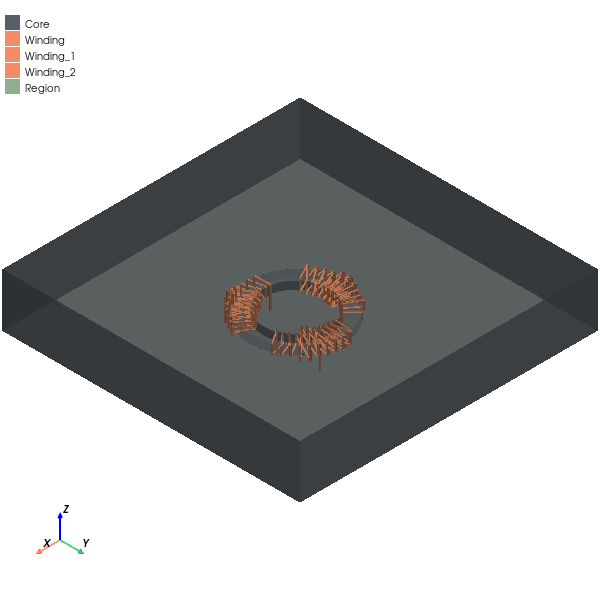

In [15]:
m3d.save_project()
m3d.modeler.fit_all()
m3d.plot(
    show=False,
    output_file=os.path.join(temp_folder.name, "Image.jpg"),
    plot_air_objects=True,
)

## Release AEDT

In [16]:
m3d.save_project()
m3d.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project choke Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell
removes all temporary files, including the project folder.

In [17]:
temp_folder.cleanup()